# Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
import os
os.listdir('../data')
TEST_PATH = "../data/test.csv"
TRAIN_PATH = "../data/train.csv"
SAMPLE_SUBMISSION_PATH = "../data/sample_submission.csv"

In [3]:
test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)
sample_submission_data = pd.read_csv(SAMPLE_SUBMISSION_PATH)

In [121]:
train_data.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [56]:
prediction_columns = [col for col in train_data.columns if col not in test_data]
input_columns = [col for col in test_data.columns]
print(prediction_columns)
print(input_columns)

['question_asker_intent_understanding', 'question_body_critical', 'question_conversational', 'question_expect_short_answer', 'question_fact_seeking', 'question_has_commonly_accepted_answer', 'question_interestingness_others', 'question_interestingness_self', 'question_multi_intent', 'question_not_really_a_question', 'question_opinion_seeking', 'question_type_choice', 'question_type_compare', 'question_type_consequence', 'question_type_definition', 'question_type_entity', 'question_type_instructions', 'question_type_procedure', 'question_type_reason_explanation', 'question_type_spelling', 'question_well_written', 'answer_helpful', 'answer_level_of_information', 'answer_plausible', 'answer_relevance', 'answer_satisfaction', 'answer_type_instructions', 'answer_type_procedure', 'answer_type_reason_explanation', 'answer_well_written']
['qa_id', 'question_title', 'question_body', 'question_user_name', 'question_user_page', 'answer', 'answer_user_name', 'answer_user_page', 'url', 'category', 

### What do data point with highest lowest label value look like?

In [5]:
print_cols = ['url']
for col in prediction_columns:
    top_value_index = train_data[col].sort_values(ascending=False).index[0]
    bottom_value_index = train_data[col].sort_values(ascending=True).index[0]
    _print = "\n## {} top value\n".format(col)
    for print_col in print_cols:
        _print += "{}: {}\n".format(print_col, train_data.iloc[top_value_index][print_col])
    print(_print)
    _print = "\n## {} bottom value\n".format(col)
    for print_col in print_cols:
        _print += "{}: {}\n".format(print_col, train_data.iloc[bottom_value_index][print_col])
    print(_print)
    
    


## question_asker_intent_understanding top value
url: http://diy.stackexchange.com/questions/2701/why-are-there-so-many-different-types-of-screws-phillps-flat-hex-star-etc


## question_asker_intent_understanding bottom value
url: http://tex.stackexchange.com/questions/133987/tuples-in-latex


## question_body_critical top value
url: http://diy.stackexchange.com/questions/2701/why-are-there-so-many-different-types-of-screws-phillps-flat-hex-star-etc


## question_body_critical bottom value
url: http://photo.stackexchange.com/questions/9169/what-am-i-losing-when-using-extension-tubes-instead-of-a-macro-lens


## question_conversational top value
url: http://scifi.stackexchange.com/questions/554/what-is-the-best-place-to-start-warhammer-40k


## question_conversational bottom value
url: http://photo.stackexchange.com/questions/9169/what-am-i-losing-when-using-extension-tubes-instead-of-a-macro-lens


## question_expect_short_answer top value
url: http://travel.stackexchange.com/question

## How is the label distribution?

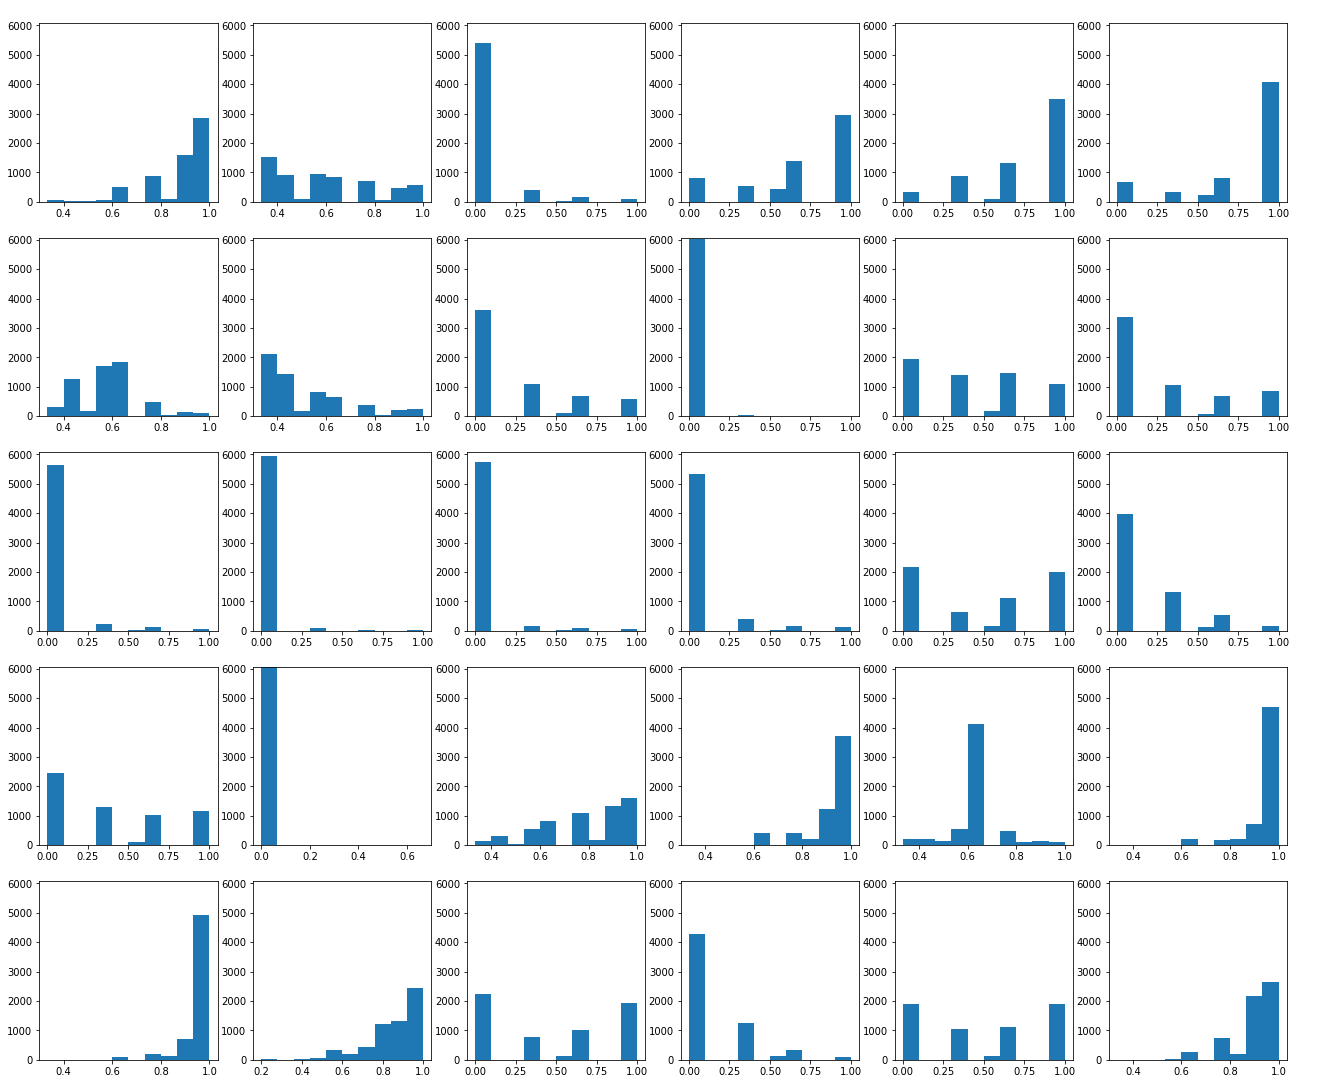

In [37]:
from matplotlib import pyplot as plt
plt.close()
fig = plt.figure()
plt.rcParams['figure.figsize'] = [21, 18]
for idx, col in enumerate(prediction_columns):
        ax = plt.subplot(5, 6, idx + 1)
        plt.hist(train_data[col])
        ax.set_title('%s' % (col), c='w')
        ax.set_ylim((0, len(train_data)))
plt.subplots_adjust(bottom=0.1, right=0.95, top=0.9)
plt.show()

## How do lables correlate with each other?

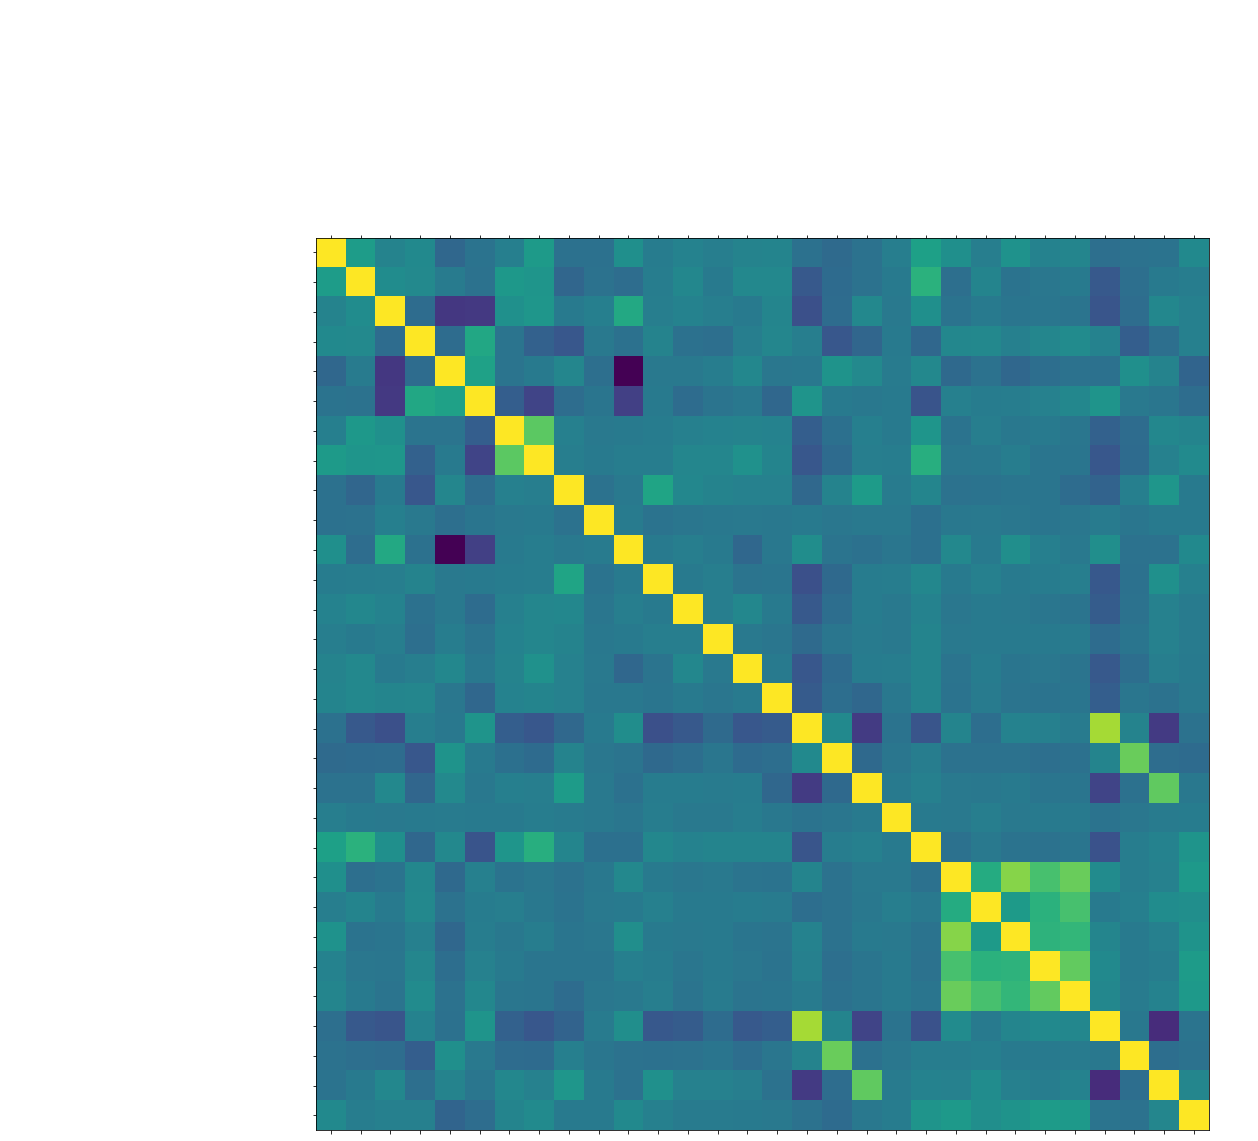

In [7]:
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
plt.matshow(train_data[prediction_columns].corr())
plt.xticks(range(len(prediction_columns)), prediction_columns, fontsize=14, rotation=45, c='w')
plt.yticks(range(len(prediction_columns)), prediction_columns, fontsize=14, c='w')
plt.show()

## Is there some clustering happening in the labels?

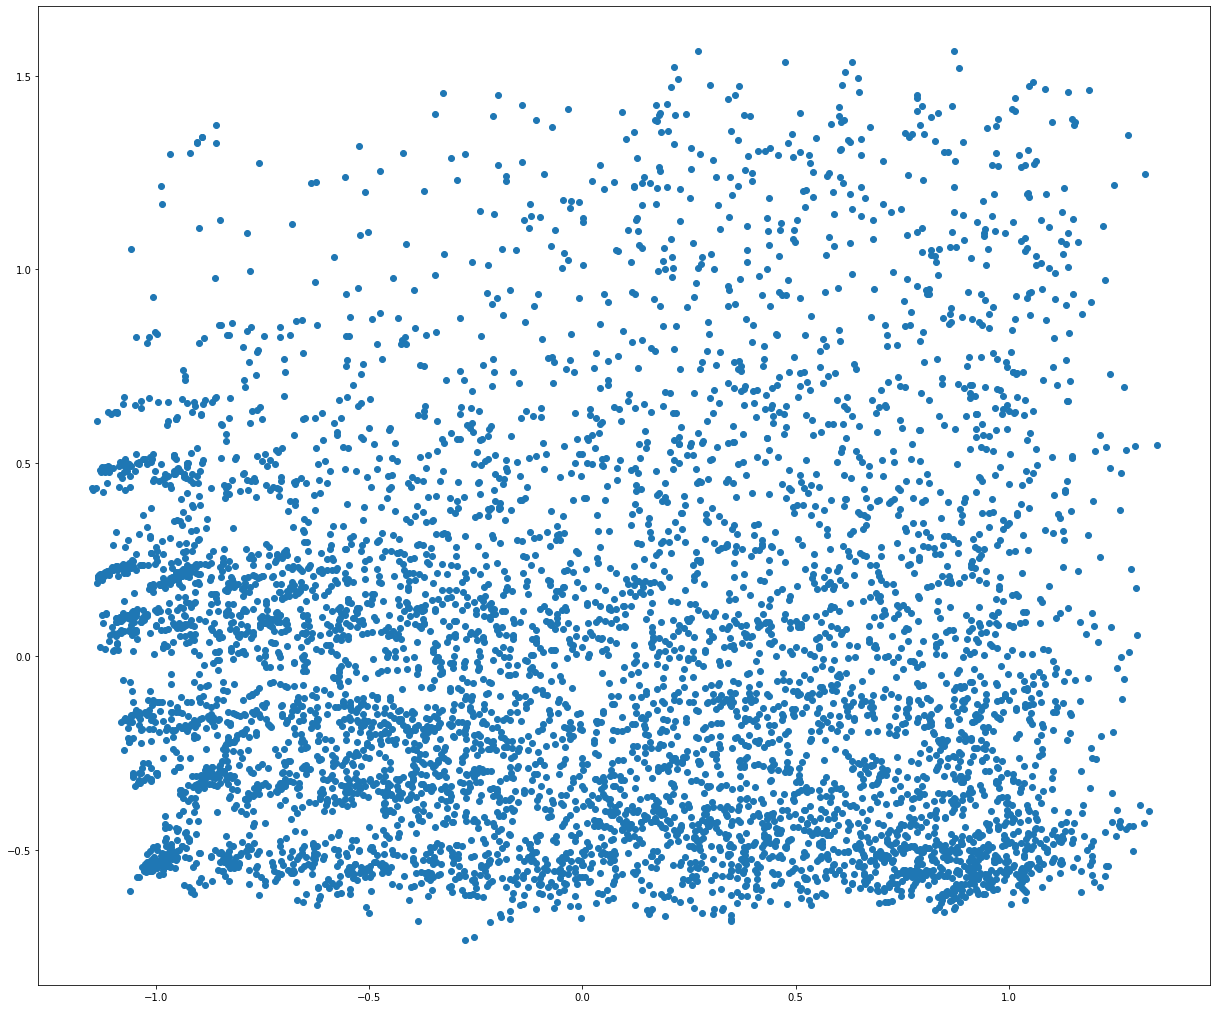

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

embed = pca.fit_transform(train_data[prediction_columns])

plt.scatter(embed[:, 0], embed[:, 1])

## What kind of categories/website do data come from?

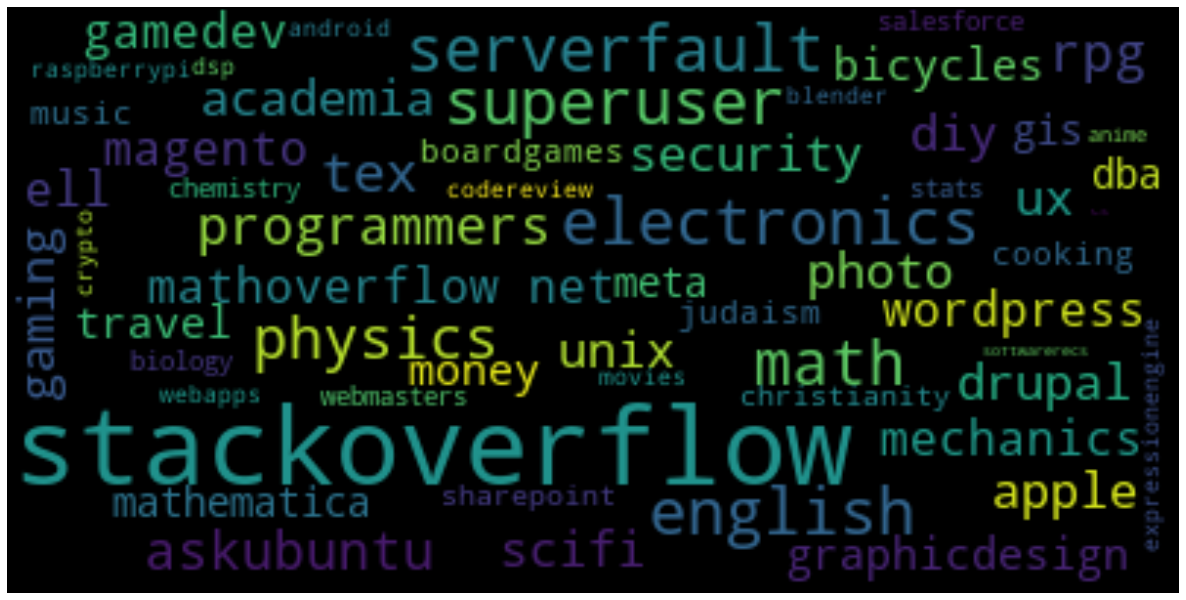

In [28]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(train_data['host'].values.tolist()).replace('.stackexchange.com', ''))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

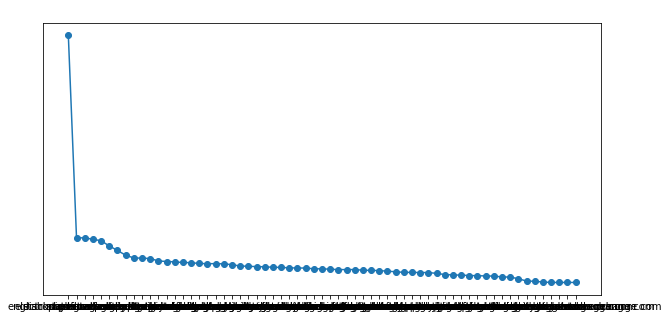

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(train_data['host'].value_counts(), marker='o')
plt.rcParams['figure.figsize'] = [10, 5]
ax.tick_params(axis='y', colors="w")
plt.title("number of data per host (website)", c="w")
plt.show()


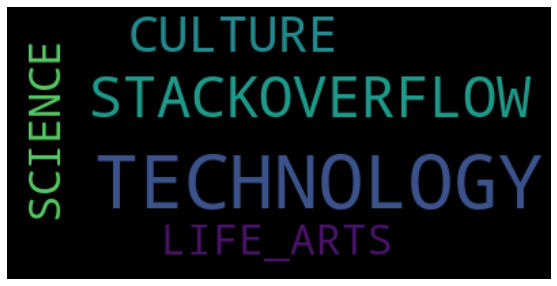

In [52]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(train_data['category'].values.tolist()).replace('.stackexchange.com', ''))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
train_data['category'].value_counts()

TECHNOLOGY       2441
STACKOVERFLOW    1253
CULTURE           963
SCIENCE           713
LIFE_ARTS         709
Name: category, dtype: int64

## Do data from same class host cluster together?

In [66]:
host_labels = train_data['host'].apply(lambda x: train_data['host'].unique().tolist().index(x)).tolist()
category_labels = train_data['category'].apply(lambda x: train_data['category'].unique().tolist().index(x)).tolist()

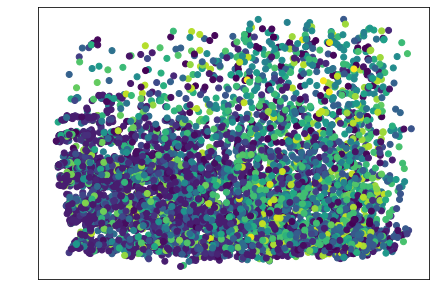

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

embed = pca.fit_transform(train_data[prediction_columns])
plt.rcParams['figure.figsize'] = [7, 5]
fig = plt.figure()
ax = fig.add_subplot(111)   
ax.tick_params(axis='y', colors="w")
ax.tick_params(axis='x', colors="w")
plt.scatter(embed[:, 0], embed[:, 1], c=host_labels)
plt.show()

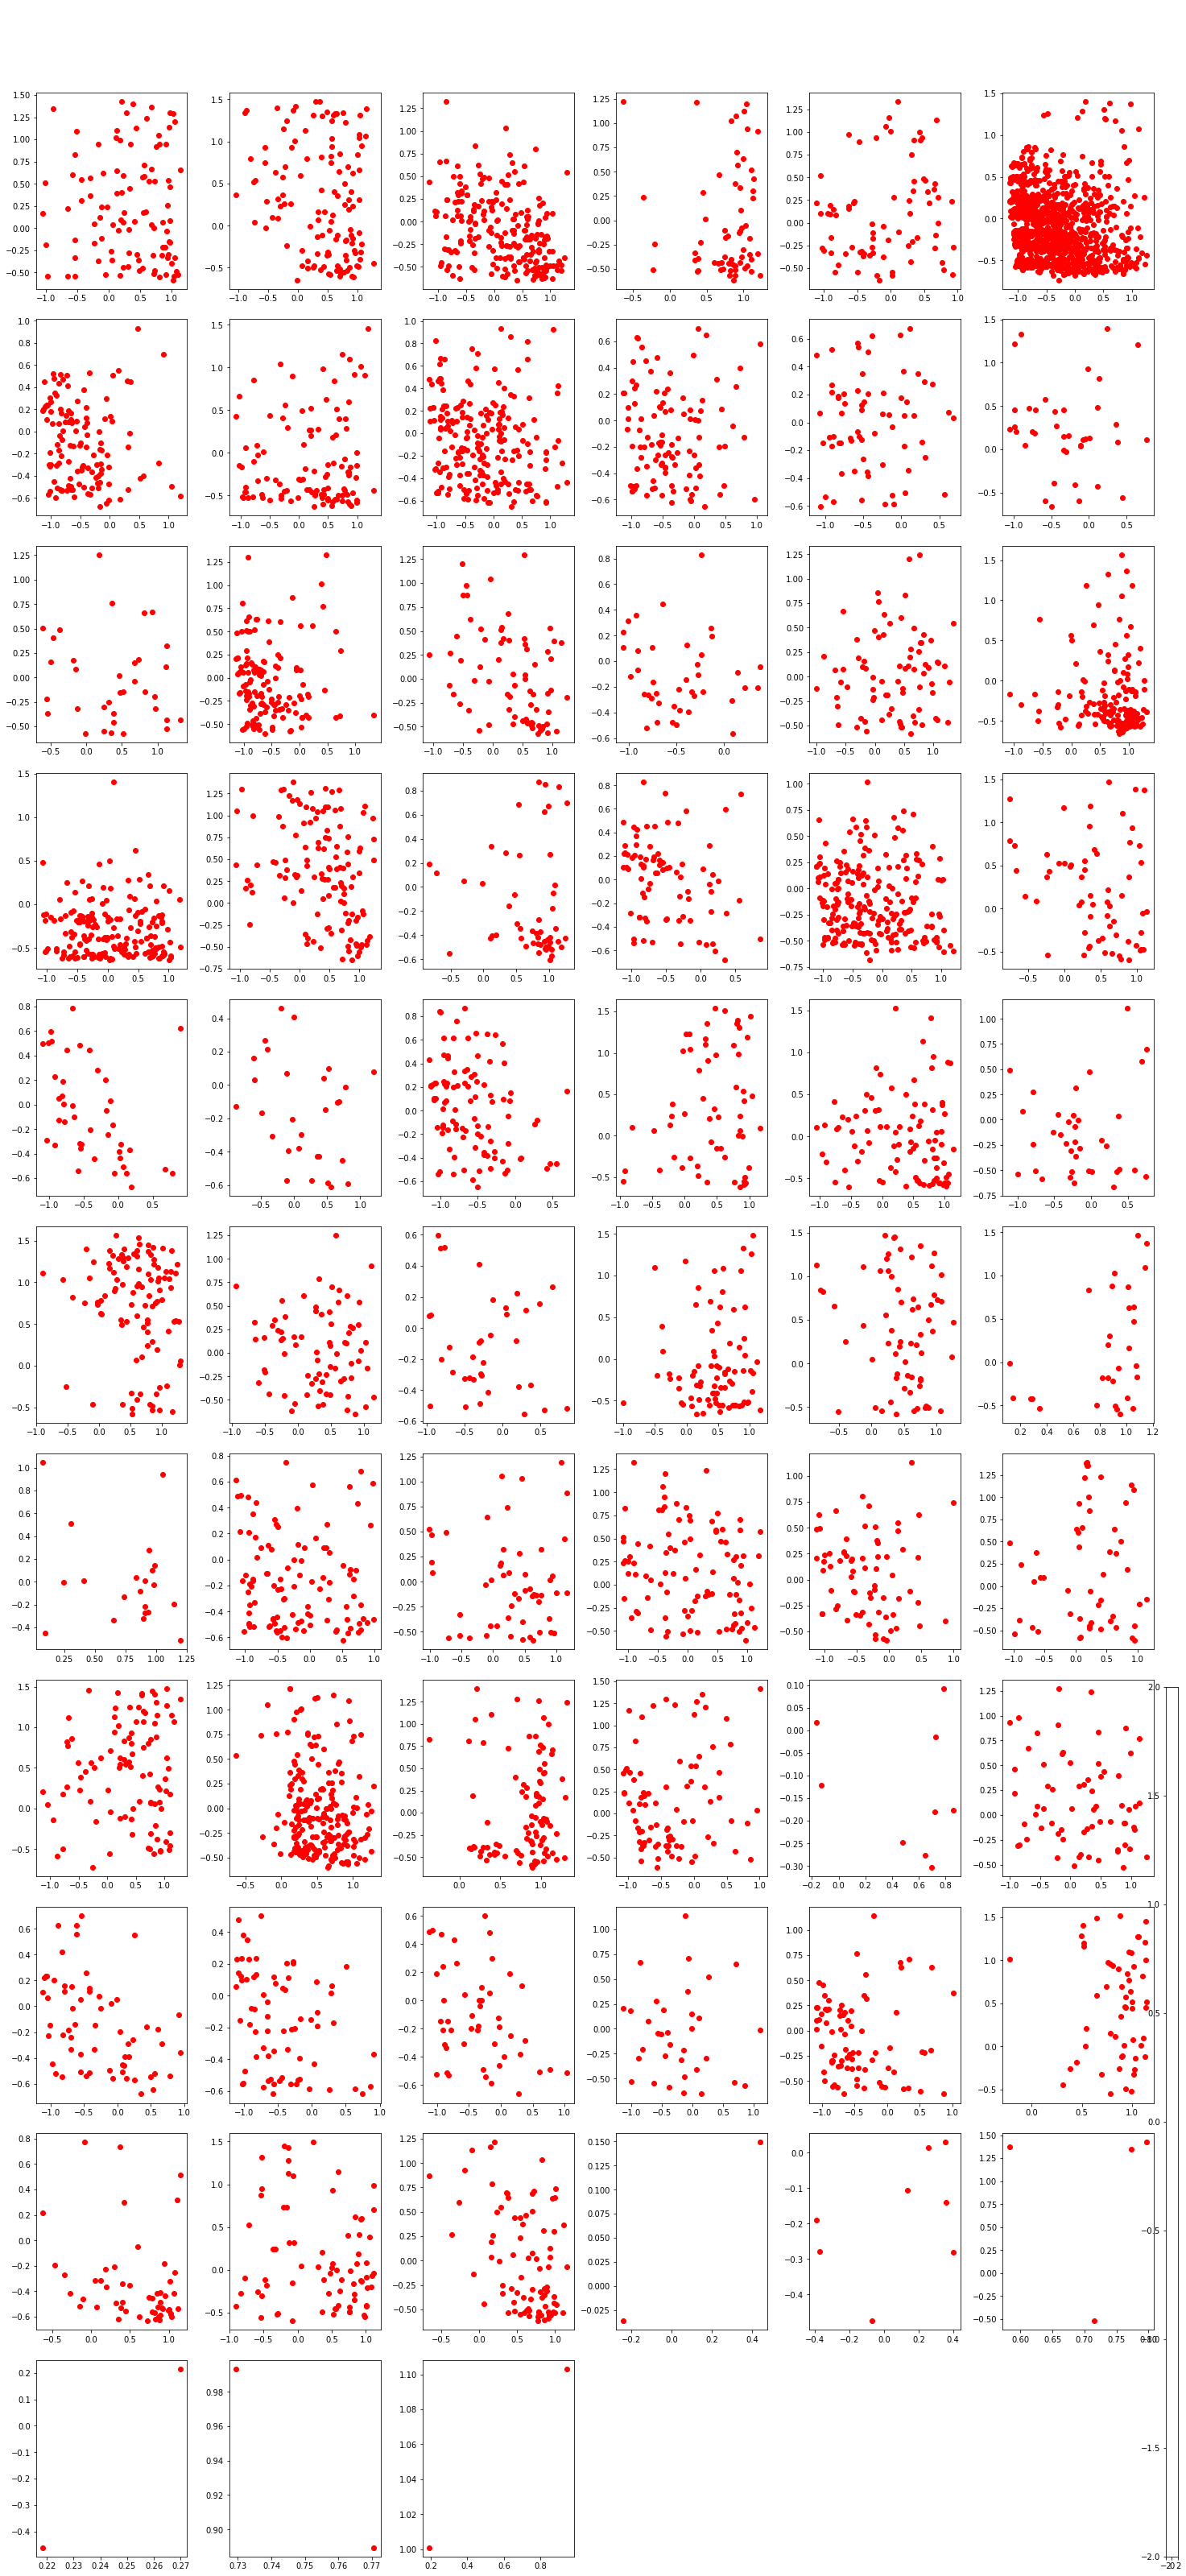

In [91]:

plt.close()
fig = plt.figure()
plt.rcParams['figure.figsize'] = [21, 50]
for index, host in enumerate(train_data['host'].unique().tolist()):
    ax = plt.subplot(11, 6, index + 1)
    host_labels_indexes = [_index for _index, value in enumerate(host_labels) if value == index]
    ebd  = embed[host_labels_indexes]
    vis_x = ebd[:, 0]
    vis_y = ebd[:, 1]
    plt.scatter(vis_x, vis_y, c="r")
    ax.set_title('%s' % (host), c="w")
plt.tight_layout()
plt.subplots_adjust(bottom=0.1, right=0.95, top=0.95)
cax = plt.axes([0.96, 0.1, 0.01, 0.3])
fig.suptitle('labels PCA by host', c="w")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()    

In [110]:
example_hosts = {"tex.stackexchange.com":  0, "physics.stackexchange.com": 1, 'academia.stackexchange.com': 2}
example_indexes, example_labels = [], []
for index, host in enumerate(train_data['host'].tolist()):
    if host in example_hosts.keys():
        example_indexes.append(index)
        example_labels.append(example_hosts[host])

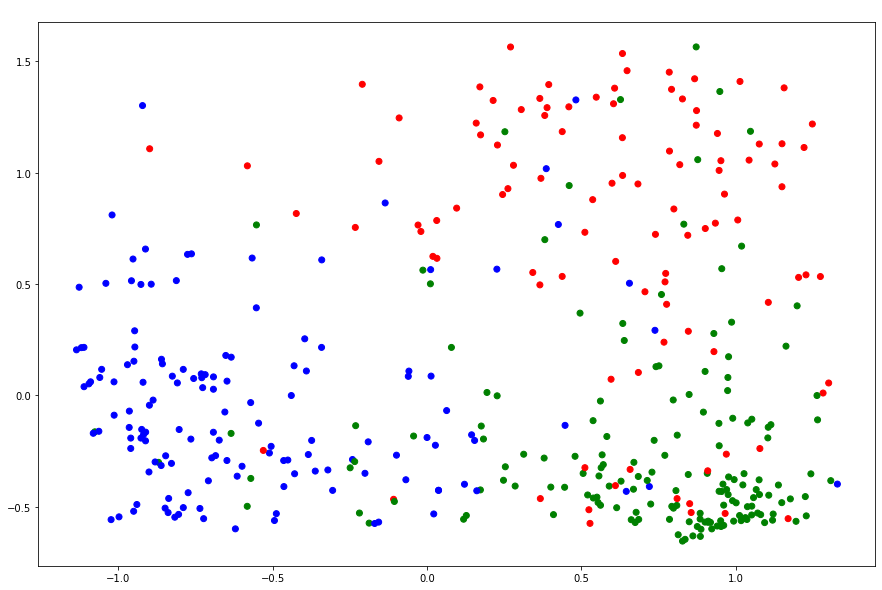

In [116]:
from matplotlib.colors import ListedColormap

ebd  = embed[example_indexes]
vis_x = ebd[:, 0]
vis_y = ebd[:, 1]
plt.rcParams['figure.figsize'] = [15, 10]
plt.scatter(vis_x, vis_y, c=example_labels, cmap=ListedColormap(["blue", "green", "red"]))
plt.title("Clustering of labels from three host on 2D PCA", c='w')
plt.show()

## Do data from same category cluster together?

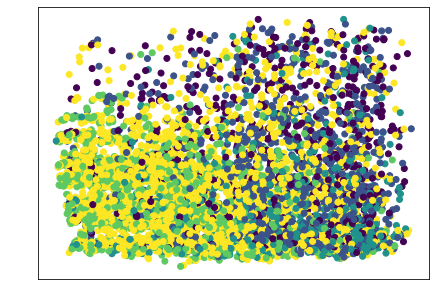

In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

embed = pca.fit_transform(train_data[prediction_columns])
plt.rcParams['figure.figsize'] = [7, 5]
fig = plt.figure()
ax = fig.add_subplot(111)   
ax.tick_params(axis='y', colors="w")
ax.tick_params(axis='x', colors="w")
plt.scatter(embed[:, 0], embed[:, 1], c=category_labels)
plt.show()

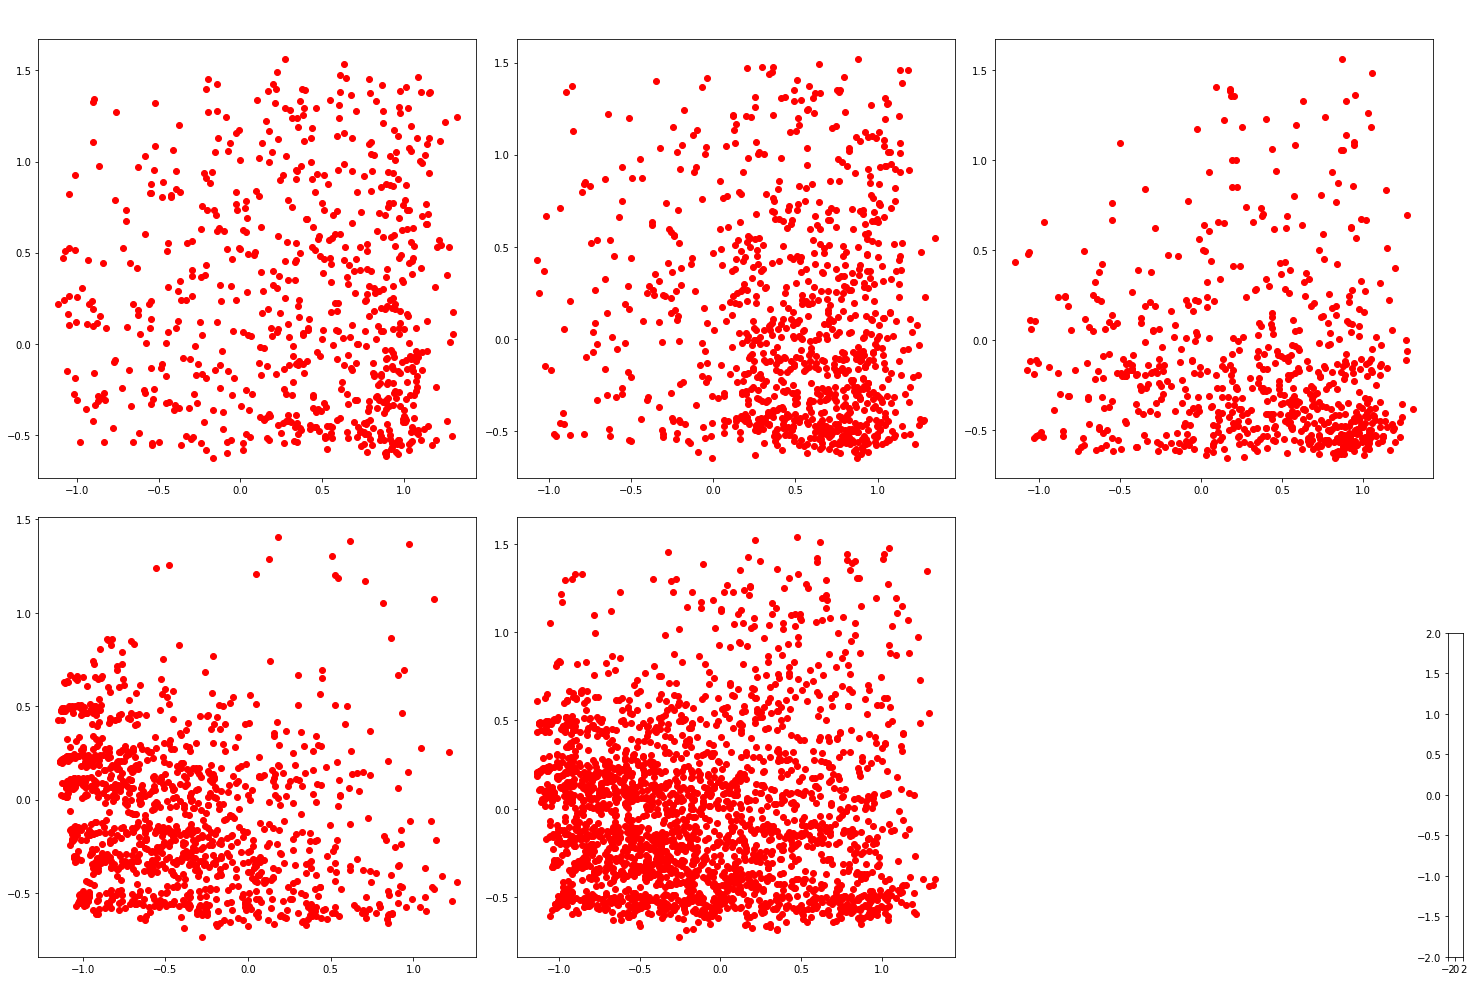

In [120]:
plt.close()
fig = plt.figure()
plt.rcParams['figure.figsize'] = [21, 15]
for index, category in enumerate(train_data['category'].unique().tolist()):
    ax = plt.subplot(2, 3, index + 1)
    category_labels_indexes = [_index for _index, value in enumerate(category_labels) if value == index]
    ebd  = embed[category_labels_indexes]
    vis_x = ebd[:, 0]
    vis_y = ebd[:, 1]
    plt.scatter(vis_x, vis_y, c="r")
    ax.set_title('%s' % (category), c="w")
plt.tight_layout()
plt.subplots_adjust(bottom=0.1, right=0.95, top=0.95)
cax = plt.axes([0.96, 0.1, 0.01, 0.3])
fig.suptitle('labels PCA by category', c="w")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()    